In [1]:
# get all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<h2> Explore the Calender file</h2>

In [7]:
#read in the file
calender_df  = pd.read_csv('C:/Users/GIGABYTE/Desktop/blog_post/calendar.csv')

In [8]:
calender_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
calender_df.shape

(1393570, 4)

In [10]:
# the null values are the ones that have no price shown when the availability is False
calender_df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [11]:
#label= Available True? False?
calender_df.available.unique()

array(['t', 'f'], dtype=object)

In [12]:
#Number of Unique Listings 
print('the number of Unique listing in the seatle area is {}'.format(len(calender_df.listing_id.unique())))

the number of Unique listing in the seatle area is 3818


In [16]:
false_filter = ([calender_df['available'] == 'f'])

In [13]:
calender_df_false = calender_df[calender_df['available'] == 'f']

In [14]:
calender_df_false.head()

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN


In [15]:
calender_df_false.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [16]:
calender_df_true = calender_df[calender_df['available'] == 't']

In [17]:
calender_df_true.shape

(934542, 4)

In [18]:
calender_df_true.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [25]:
calender_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [174]:
calender_df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

have to change the columns from object to int for price and 0 and 1 for available

In [19]:
#cleaned the price col and removed the $
calender_df['price'].replace({'\$':''}, regex=True, inplace=True)

In [ ]:
#change the date col into a datetime
calender_df['date'] = pd.to_datetime(calender_df['date'])

In [ ]:
calender_df['price'] = pd.to_numeric(calender_df['price'], errors='coerce')

In [27]:
calender_df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [28]:
calender_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [30]:
len(calender_df.listing_id.unique())

3818

In [32]:
time_df = calender_df.set_index('date')

In [36]:
time_df_2016 = time_df['2016']

In [37]:
time_df_2016.head()

,listing_id,available,price
date,,,
2016-01-04,241032,t,85.0
2016-01-05,241032,t,85.0
2016-01-06,241032,f,NaN
2016-01-07,241032,f,NaN
2016-01-08,241032,f,NaN


Resampling on monthly basis, and getting mean

In [40]:
time_df_2016.resample('M')['price'].mean()

date
2016-01-31    121.256898
2016-02-29    123.947429
2016-03-31    127.963804
2016-04-30    134.400282
2016-05-31    138.832159
2016-06-30    146.771935
2016-07-31    151.286857
2016-08-31    149.712349
2016-09-30    142.285931
2016-10-31    136.140247
2016-11-30    134.815529
2016-12-31    136.306108
Freq: M, Name: price, dtype: float64

In [41]:
time_df_2016.resample('M')['price'].median()

date
2016-01-31     99.0
2016-02-29    100.0
2016-03-31    100.0
2016-04-30    110.0
2016-05-31    110.0
2016-06-30    110.0
2016-07-31    115.0
2016-08-31    114.0
2016-09-30    110.0
2016-10-31    109.0
2016-11-30    105.0
2016-12-31    109.0
Freq: M, Name: price, dtype: float64

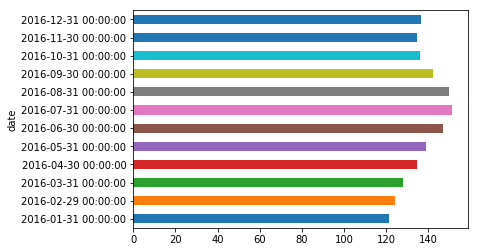

In [48]:
time_df_2016.resample('M')['price'].mean().plot(kind='barh')

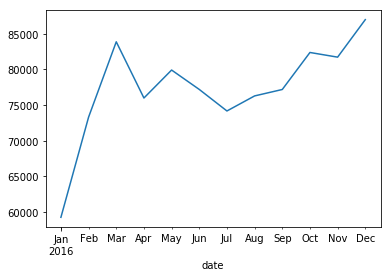

In [44]:
time_df_2016.resample('M')['price'].count().plot()

In [51]:
time_df_2016_not_available = time_df_2016[time_df_2016['available']=='f']

In [53]:
time_df_2016_not_available['available'].head()

date
2016-01-06    f
2016-01-07    f
2016-01-08    f
2016-01-09    f
2016-01-10    f
Name: available, dtype: object

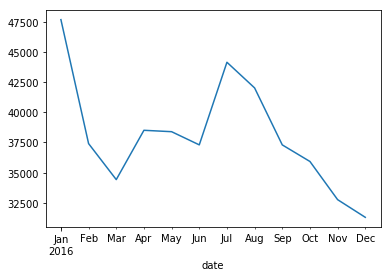

In [54]:
time_df_2016_not_available.resample('M')['available'].count().plot()

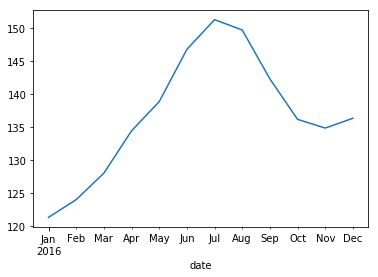

In [43]:
time_df_2016.resample('M')['price'].mean().plot()

In [42]:
time_df.describe()

,listing_id,price
count,1.393570e+06,933845.000000
mean,5.550111e+06,137.192227
std,2.962274e+06,101.243661
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,999.000000


In [23]:
calender_df.describe()

,listing_id,price
count,1.393570e+06,933845.000000
mean,5.550111e+06,137.192227
std,2.962274e+06,101.243661
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,999.000000


In [94]:
#group by total fund by listing
calender_df.groupby('listing_id').sum().head()

,price
listing_id,
3335,37080.0
4291,29930.0
5682,16669.0
6606,33890.0
7369,4505.0


In [26]:
calender_df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [177]:
calender_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [65]:
calender_df_test_price = calender_df['price'].astype(str)

In [100]:
#types have been changed to better fit the analysis
calender_df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [179]:

calender_df['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [203]:
time_df_2016[time_df_2016['available']=='t'].resample('M').count()

,listing_id,available,price
date,,,
2016-01-31,59239,59239,59218
2016-02-29,73321,73321,73292
2016-03-31,83938,83938,83876
2016-04-30,76037,76037,75979
2016-05-31,79971,79971,79909
2016-06-30,77244,77244,77184
2016-07-31,74222,74222,74159
2016-08-31,76347,76347,76273
2016-09-30,77246,77246,77176


In [ ]:
time_df_not_available.head()

In [ ]:
time_df_not_available.resample('M')['available'].count().plot(kind='bar')

In [101]:
time_df = calender_df.set_index('date')

In [105]:
time_df.head()


,listing_id,available,price
date,,,
2016-01-04,241032,t,85.0
2016-01-05,241032,t,85.0
2016-01-06,241032,f,NaN
2016-01-07,241032,f,NaN
2016-01-08,241032,f,NaN


In [110]:
df_time_jan = time_df['2016-01'].groupby('listing_id')['price'].mean()

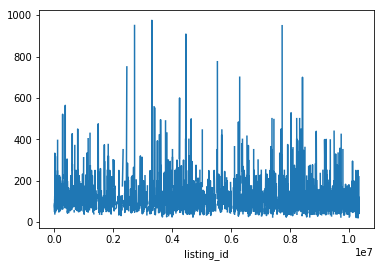

In [115]:
df_time_jan.plot()

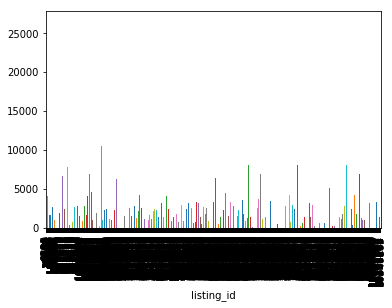

In [117]:
time_df['2016-01'].groupby('listing_id')['price'].sum().plot(kind='bar')

In [121]:
time_df['2016'].groupby('listing_id')['price'].sum().head()

listing_id
3335    36840.0
4291    29766.0
5682    16621.0
6606    33710.0
7369     4505.0
Name: price, dtype: float64

In [127]:
time_df.resample('Y').sum()

,listing_id,price
date,,
2016-12-31,7692088118748,127340318.0
2017-12-31,42380650792,775957.0


In [125]:
time_df.describe()

,listing_id,price
count,1.393570e+06,933845.000000
mean,5.550111e+06,137.192227
std,2.962274e+06,101.243661
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,999.000000


Better to remove Jan 2017 from calculation

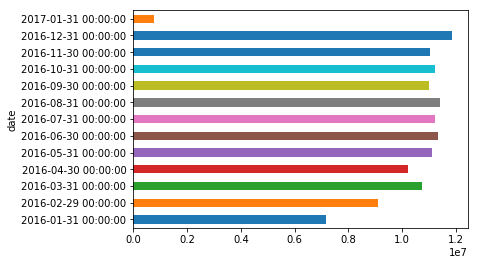

In [136]:
time_df.resample('M')['price'].sum().plot(kind='barh')

In [137]:
time_df.resample('M')['price'].sum()

date
2016-01-31     7180591.0
2016-02-29     9084355.0
2016-03-31    10733092.0
2016-04-30    10211599.0
2016-05-31    11093939.0
2016-06-30    11328445.0
2016-07-31    11219282.0
2016-08-31    11419010.0
2016-09-30    10981059.0
2016-10-31    11214689.0
2016-11-30    11017125.0
2016-12-31    11857132.0
2017-01-31      775957.0
Freq: M, Name: price, dtype: float64

In [138]:
time_df.resample('M')['price'].mean()

date
2016-01-31    121.256898
2016-02-29    123.947429
2016-03-31    127.963804
2016-04-30    134.400282
2016-05-31    138.832159
2016-06-30    146.771935
2016-07-31    151.286857
2016-08-31    149.712349
2016-09-30    142.285931
2016-10-31    136.140247
2016-11-30    134.815529
2016-12-31    136.306108
2017-01-31    136.276256
Freq: M, Name: price, dtype: float64

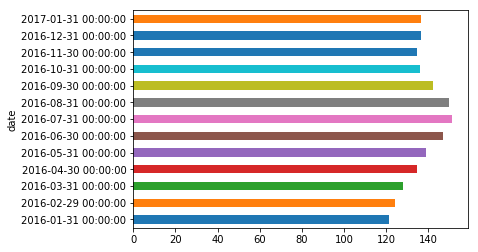

In [139]:
time_df.resample('M')['price'].mean().plot(kind='barh')

In [142]:
time_df_2016 = time_df['2016']

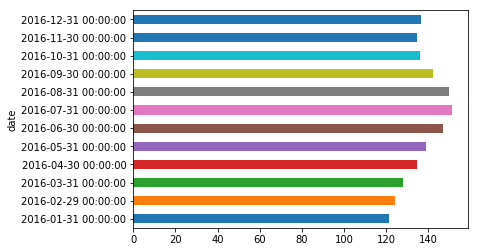

In [147]:
time_df_2016.resample('M')['price'].mean().plot(kind='barh')

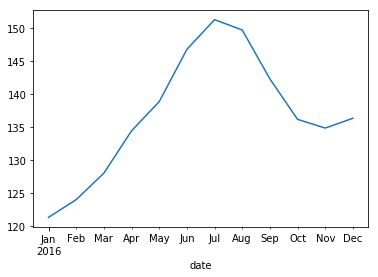

In [163]:
time_2016_df_test = time_df_2016.resample('M')['price'].mean().plot()

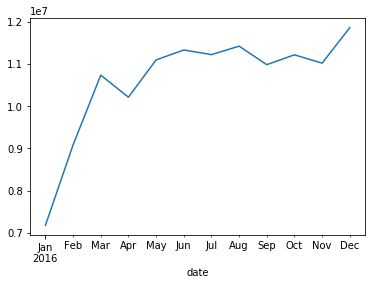

In [164]:
time_2016_df_test = time_df_2016.resample('M')['price'].sum().plot()

In [166]:
time_df_2016.resample('M')['price'].sum()

date
2016-01-31     7180591.0
2016-02-29     9084355.0
2016-03-31    10733092.0
2016-04-30    10211599.0
2016-05-31    11093939.0
2016-06-30    11328445.0
2016-07-31    11219282.0
2016-08-31    11419010.0
2016-09-30    10981059.0
2016-10-31    11214689.0
2016-11-30    11017125.0
2016-12-31    11857132.0
Freq: M, Name: price, dtype: float64

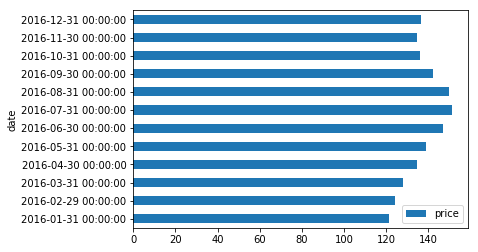

In [154]:
pd.DataFrame(time_2016_df_test).plot(kind='barh');

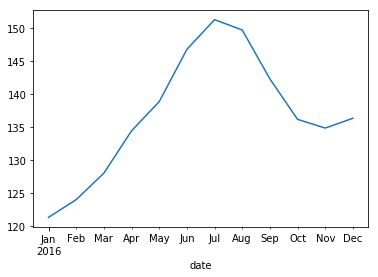

In [162]:
time_2016_df_test.plot()